In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\AP\Desktop\states_all.csv')

In [14]:
# fill nulls using interpolate because data is time series

fill_list = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G']

for col in fill_list:
    df.loc[:, col].interpolate(inplace=True)
    
# drop nulls after interpolation
df.dropna(inplace=True)

In [5]:
df.head(3)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
204,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646973,256.594863,210.920767,260.276441
206,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
207,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590


-----------------------

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [6]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,467.000000,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,...,467.000000,467.000000,467.000000,4.670000e+02,4.670000e+02,4.670000e+02,467.000000,467.000000,467.000000,467.000000
mean,2008.550321,8.489875e+05,9.556240e+06,8.535607e+05,4.449263e+06,4.253416e+06,9.650088e+06,4.974320e+06,2.818514e+06,4.329397e+05,...,64402.498929,64940.312634,57220.366167,5.189973e+05,2.546720e+05,8.323397e+05,236.880362,279.791910,219.507572,263.770101
std,5.802835,1.089771e+06,1.261528e+07,1.276115e+06,5.913639e+06,5.867024e+06,1.284741e+07,6.742753e+06,3.593913e+06,5.684064e+05,...,84244.766396,83975.178821,75007.839209,6.766360e+05,3.321152e+05,9.801761e+05,8.709717,9.374323,7.418609,6.881618
min,1996.000000,4.417900e+04,6.640570e+05,4.100700e+04,0.000000e+00,2.853100e+04,6.763050e+05,3.182600e+05,2.002280e+05,2.191000e+04,...,1212.000000,1103.000000,1024.000000,9.403000e+03,5.084000e+03,3.682300e+04,187.134670,232.831510,181.626991,236.379102
25%,2005.000000,1.488310e+05,2.044669e+06,1.843005e+05,1.175899e+06,7.457580e+05,2.034229e+06,9.866175e+05,5.857000e+05,7.751650e+04,...,11260.500000,12253.500000,10624.000000,8.997000e+04,4.812900e+04,2.805765e+05,232.709870,274.725352,215.366575,259.589293
50%,2009.000000,5.484660e+05,5.038100e+06,4.591320e+05,2.612740e+06,1.966024e+06,5.198975e+06,2.601684e+06,1.525340e+06,2.622670e+05,...,42858.000000,43067.000000,38662.000000,3.425700e+05,1.721850e+05,5.267300e+05,238.366542,281.503602,221.096695,265.194041
75%,2013.000000,9.685375e+05,1.088054e+07,9.221925e+05,5.420840e+06,4.634315e+06,1.086277e+07,5.585754e+06,3.158876e+06,5.138145e+05,...,75676.500000,76299.500000,70667.000000,6.127160e+05,2.954645e+05,9.234425e+05,242.600258,286.195612,224.530382,268.299906
max,2017.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


1. Mean TOTAL REVENUE is less than mean TOTAL EXPENDITURE, implying a budget deficit in education across the nation.
2. FEDERAL REVENUE is a major source of revenue.
3. Mean AVG MATH SCOREs are higher than mean AVG READING SCOREs, but AVG MATH SCOREs have more variation.

--------------------------

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

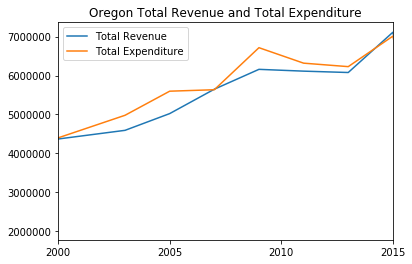

In [15]:
# line graph oregon revenue vs. expenditure

plt.plot(df.loc[df.STATE == "OREGON", "YEAR"],
         df.loc[df.STATE == "OREGON", "TOTAL_REVENUE"], label="Total Revenue")

plt.plot(df.loc[df.STATE == "OREGON", "YEAR"],
         df.loc[df.STATE == "OREGON", "TOTAL_EXPENDITURE"], label="Total Expenditure")

plt.title("Oregon Total Revenue and Total Expenditure")
plt.xlim(2000, 2015)
plt.xticks(list(range(2000, 2016, 5)))
plt.legend();

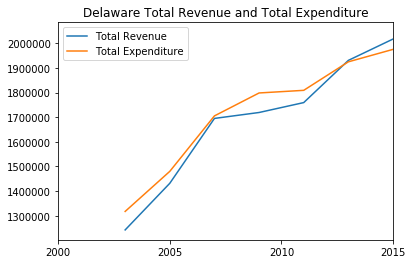

In [16]:
# line graph delaware revenue vs. expenditure

plt.plot(df.loc[df.STATE == "DELAWARE", "YEAR"],
         df.loc[df.STATE == "DELAWARE", "TOTAL_REVENUE"], label="Total Revenue")

plt.plot(df.loc[df.STATE == "DELAWARE", "YEAR"],
         df.loc[df.STATE == "DELAWARE", "TOTAL_EXPENDITURE"], label="Total Expenditure")

plt.title("Delaware Total Revenue and Total Expenditure")
plt.xlim(2000, 2015)
plt.xticks(list(range(2000, 2016, 5)))
plt.legend();

Looking at Oregon, total expenditures have consistently been higher than total revenue, except for 2015 when revenue was slightly higher, if not equal to, expenditure. You can see from the graph that right around the 2008 recession, revenue flattened and did not increase for a few years.

3. In your chosen state, which of the lessons are the students more successful, math or reading?

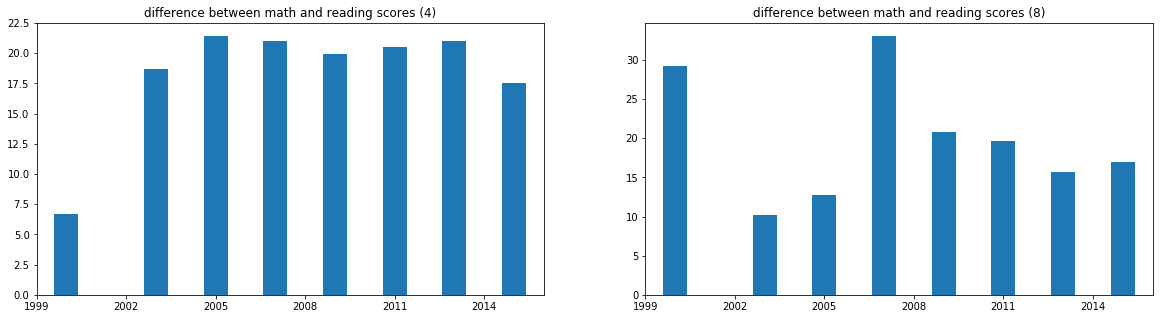

In [9]:
# bar chart oregon difference in scores

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(df.loc[df.STATE == "OREGON", "YEAR"],
         df.loc[df.STATE == "OREGON", "AVG_MATH_4_SCORE"] - df.loc[df.STATE == "OREGON", "AVG_READING_4_SCORE"])

plt.title("difference between math and reading scores (4)")
plt.xlim(2000, 2016)
plt.xticks(list(range(1999, 2017, 3)))

plt.subplot(1,2,2)
plt.bar(df.loc[df.STATE == "OREGON", "YEAR"],
         df.loc[df.STATE == "OREGON", "AVG_MATH_8_SCORE"] - df.loc[df.STATE == "OREGON", "AVG_READING_8_SCORE"])

plt.title("difference between math and reading scores (8)")
plt.xlim(2000, 2016)
plt.xticks(list(range(1999, 2017, 3)));

Plotting the difference between math minus reading scores results in a positive number, meaning math scores are on average higher than reading.

4. What are the distributions of the math and reading scores in the sample?

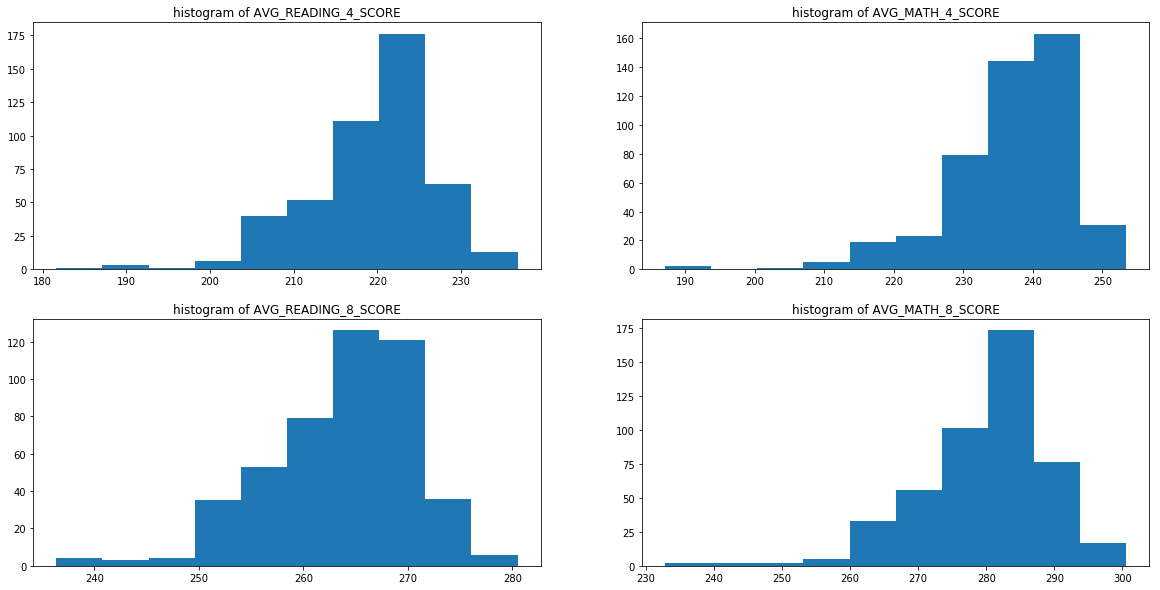

In [10]:
# histogram national distributions

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

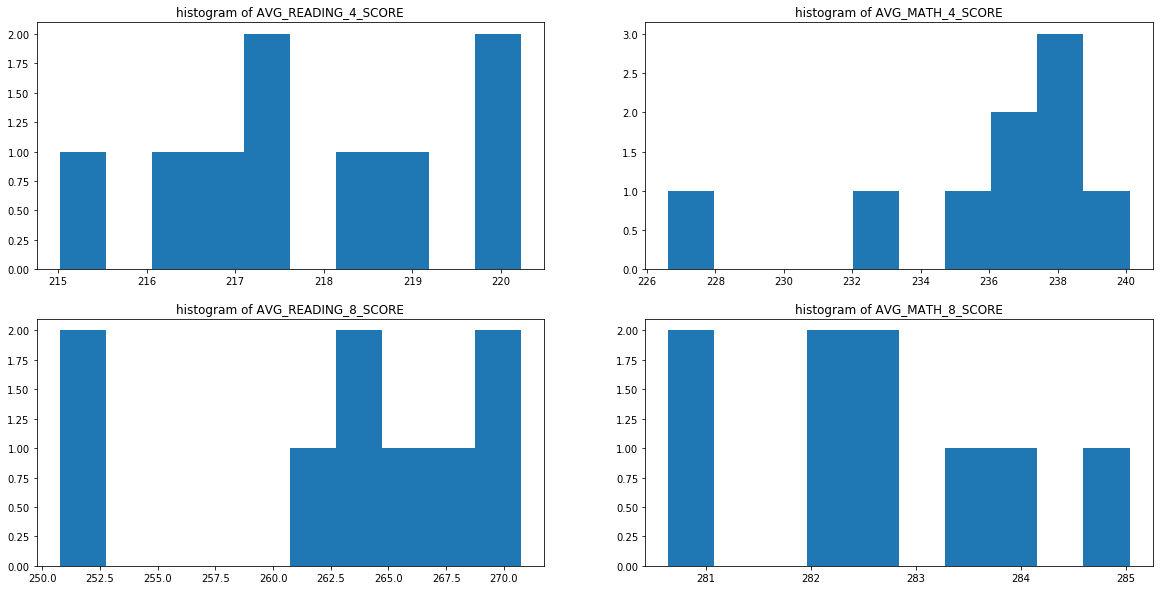

In [11]:
# histogram oregon distributions

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df.loc[df.STATE == "OREGON", "AVG_READING_4_SCORE"].dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(df.loc[df.STATE == "OREGON", "AVG_MATH_4_SCORE"].dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(df.loc[df.STATE == "OREGON", "AVG_READING_8_SCORE"].dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(df.loc[df.STATE == "OREGON", "AVG_MATH_8_SCORE"].dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

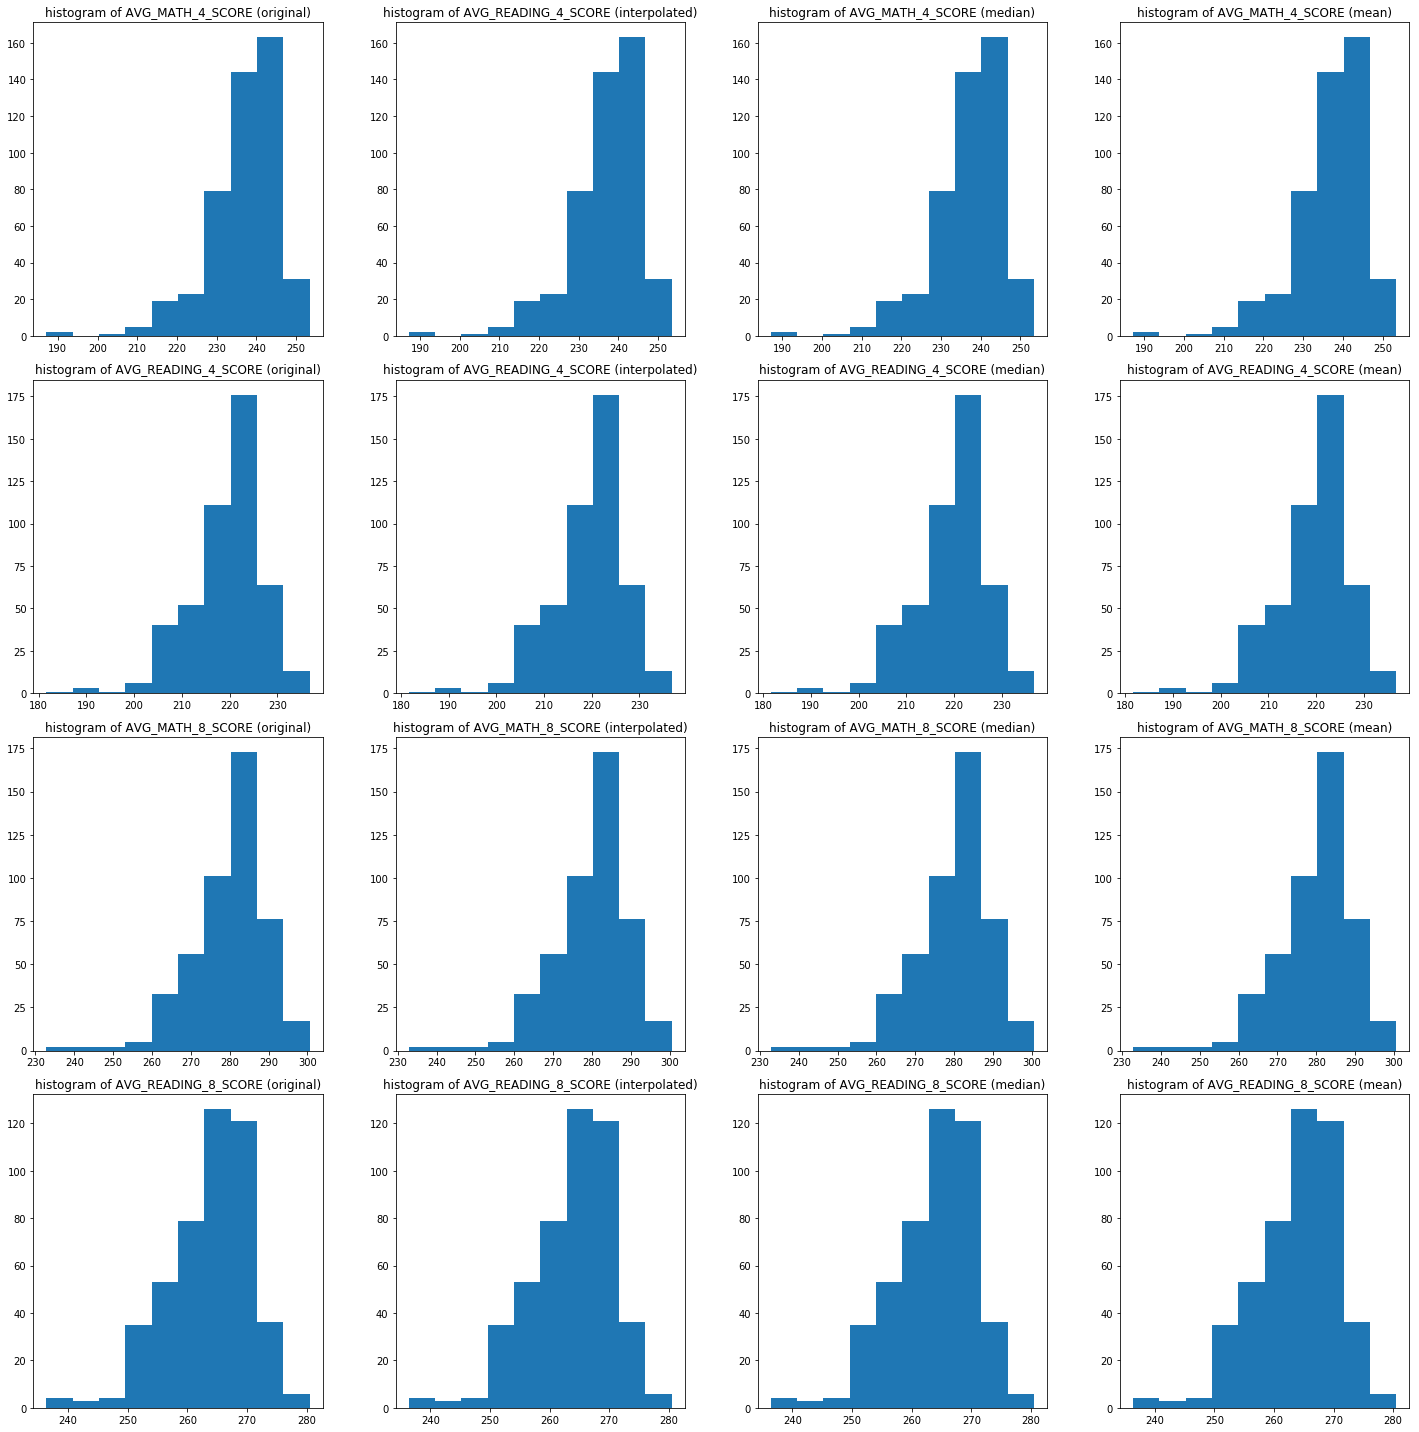

In [13]:
# histogram scores drop, interpolate, fill

plt.subplot(4,4,1)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (mean)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,9)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (mean)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,13)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout();